# NSMC를 통한 감정분석
## nsmc 불러와서 텍스트 정제하기
: 감정 분석을 위해 Naver Movie Corpus( https://github.com/e9t/nsmc)을 사용

### 1. nsmc 불러오기

In [1]:
def read_documents(filename):
    with open(filename, encoding='utf-8') as f:
        documents = [line.split('\t') for line in f.read().splitlines()]
        documents = documents[1:]
        
    return documents
    
train_docs = read_documents("/Users/jeonghyeonjeong/for github/머신러닝_데이터분석A-Z_패스트캠퍼스/텍스트마이닝을 활용한 카카오톡 감성분석/data/nsmc/ratings_train.txt")
test_docs = read_documents("/Users/jeonghyeonjeong/for github/머신러닝_데이터분석A-Z_패스트캠퍼스/텍스트마이닝을 활용한 카카오톡 감성분석/data/nsmc/ratings_test.txt")

In [2]:
print(len(train_docs)) #15만 개
print(len(test_docs)) #5만 개

150000
50000


### 2. 함수 정의 - 저번에 한 것 그대로

In [3]:
def text_cleaning(doc):
    # 한국어를 제외한 글자를 제거하는 함수.
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    return doc

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path) as f:
        for word in f:
            SW.add(word)
            
    return SW

def text_tokenizing(doc):
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    #return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

### 3. 불러온 데이터를 품사 태그를 붙여서 토크나이징 한다. 
: 영화리뷰는 앞서 했던 네이버 기사 분석의 기사 보다 더 sns틱하다. 'ㅋㅋㅋㅋㅋ'이렇게 완벅한 한국어가 아닌 것도 있고,, 그래서 형태소 분석기를 사용해서 한다. 

In [4]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))
from konlpy.tag import Mecab
from konlpy.tag import Okt
import json
import os
import re
from pprint import pprint

#형태소 분석기 불러오기
okt = Okt()
mecab = Mecab()

SW = define_stopwords("/Users/jeonghyeonjeong/for github/머신러닝_데이터분석A-Z_패스트캠퍼스/텍스트마이닝을 활용한 카카오톡 감성분석/data/stopwords-ko.txt")

if os.path.exists('train_docs.json'):
    with open("train_docs.json", encoding='utf-8') as f:
        train_data = json.load(f)
else:
    train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])]
#     train_data = []
#     for line in train_docs:
#         if text_tokenizing(line[1]):
#             train_data.append((text_tokenzing(line[1]), line[2]))
    
    
    with open("train_docs.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
if os.path.exists('test_docs.json'):
    with open("test_docs.json", encoding='utf-8') as f:
        test_data = json.load(f)
else:
    test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
    
    with open("test_docs.json", 'w', encoding='utf-8') as f:
        json.dump(test_data, f, ensure_ascii=False, indent='\t')

pprint(train_data[0])
pprint(test_data[0])

(['진짜', '짜증', '네요', '목소리'], '0')
(['GDNTOPCLASSINTHECLUB'], '0')


### 4. NLTK를 이용한 histogram 분석
* 데이터 분석을 하기 위해 기본적인 정보들을 확인합니다.

* nltk 라이브러리를 이용하여 전처리를 합니다.


In [5]:
import nltk

In [6]:
total_tokens = [token for doc in train_data for token in doc[0]] #train_data 하나하나(doc) 의 [0]에 있는 것을 token이라고 한다.  token을 원소하는데 
print(len(total_tokens))

1206841


In [9]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

51722
[('영화', 57614),
 ('..', 22813),
 ('는데', 11543),
 ('너무', 11002),
 ('정말', 9783),
 ('으로', 9322),
 ('네요', 9053),
 ('재밌', 9022),
 ('지만', 8366),
 ('진짜', 8326)]


위에 보면 '..' 같은 특수 문자가 있는 것을 알 수 있다. 
sns 같은 텍스트의 경우, 한글 제외하고 다 빼버리면 매우 위험한다. sns에서는 영어, 숫자, 특수문자 등이 큰 의미를 가질 수 있기 때문이다. ex) JMT, 100점이다. 등등..

그래서 sns텍스트 분석에서는 cleaning을 처음부터 하진 않는다. 

### 5. Histogram 그리기

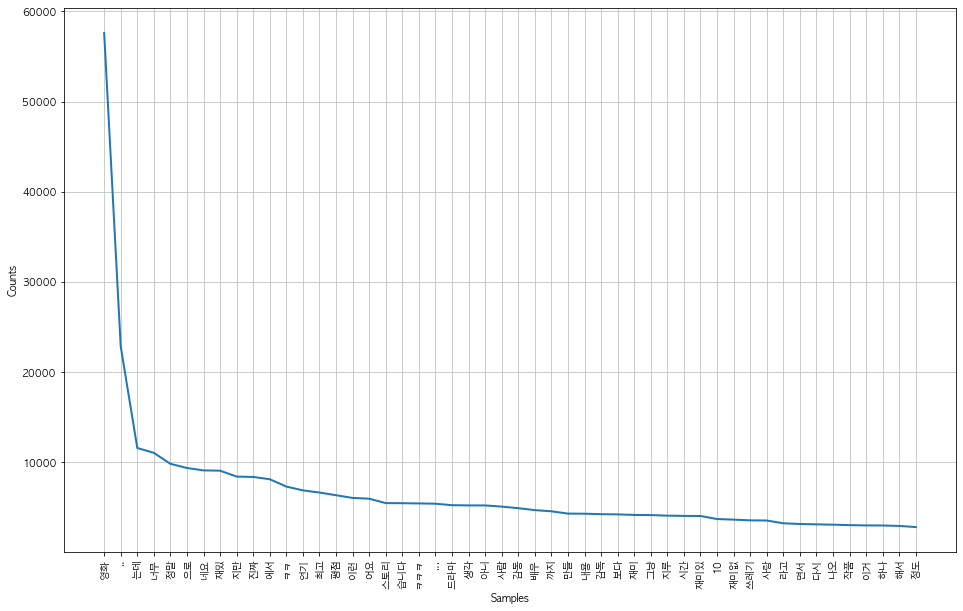

In [10]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50) #50개

### 6. WordCloud 그리기

In [12]:
pip install wordcloud #wordcloud 설치

     |████████████████████████████████| 163kB 227kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


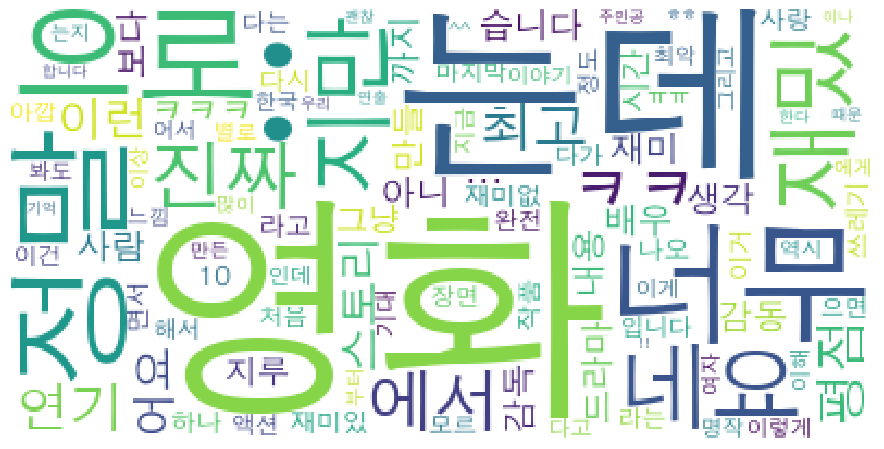

In [13]:
from wordcloud import WordCloud

data = text.vocab().most_common(100)

wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS, #wordcloud에서 안 보였으면 좋겠는 단어 지정
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off") # 중요, wordcloud에는 x, y축이 필요없으니까 지워주기
plt.show()

명사 분석결과로 하면 더 의미있는 결과를 볼 수 있을 것 같다. 